In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [2]:
df=pd.read_csv("ATKtst.csv")
df.head()

C:\Users\Monica\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated.1,data.len,class
0,0,?,0,1393668189,0.000000,0.000000,0.000000,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
1,0,?,0,1393668189,0.001056,0.001056,0.001056,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
2,0,?,0,1393668189,0.000141,0.000141,0.001197,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0,1393668189,0.000156,0.000156,0.001353,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0,1393668189,0.001842,0.001842,0.003195,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal


In [3]:
target={'amok':0, 'arp':1, 'beacon':2, 'cafe_latte':3, 'chop_chop':4, 'cts':5,'deauthentication':6, 'disassociation':7,'evil_twin':8, 'fragmentation':9,
       'hirte':10, 'normal':11, 'power_saving':12, 'probe_request':13, 'rts':14}
df['class']=df['class'].map(target)
df

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated.1,data.len,class
0,0,?,0,1393668189,0.000000,0.000000,0.000000,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,11
1,0,?,0,1393668189,0.001056,0.001056,0.001056,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,11
2,0,?,0,1393668189,0.000141,0.000141,0.001197,40,40,0,...,?,?,?,?,?,?,?,?,?,11
3,0,?,0,1393668189,0.000156,0.000156,0.001353,40,40,0,...,?,?,?,?,?,?,?,?,?,11
4,0,?,0,1393668189,0.001842,0.001842,0.003195,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575638,0,?,0,1393669389,0.000643,0.000643,1200.261948,40,40,0,...,?,?,?,?,?,?,?,?,?,11
575639,0,?,0,1393669389,0.005485,0.005485,1200.267433,261,261,0,...,?,?,?,?,?,?,?,?,?,11
575640,0,?,0,1393669389,0.008112,0.008112,1200.275545,124,124,0,...,1,0,0x0000,0,?,?,?,0,60,11
575641,0,?,0,1393669389,0.006147,0.006147,1200.281692,1524,1524,0,...,1,0,0x0000,0,?,?,?,0,1460,11


In [4]:
Z=df.iloc[ : ,0:154]
Y=df['class']
X=Z.replace("?", np.NaN)
S=X.isnull().sum()
R=np.where(S)[0]
X.drop(X.iloc[:,R],axis=1,inplace=True)
X

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.fc.ds,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order
0,0,0,1393668189,0.000000,0.000000,0.000000,1552,1552,0,0,...,0,2,8,0x02,0,0,0,0,1,0
1,0,0,1393668189,0.001056,0.001056,0.001056,1552,1552,0,0,...,0,2,8,0x02,0,1,0,0,1,0
2,0,0,1393668189,0.000141,0.000141,0.001197,40,40,0,0,...,0,1,13,0x00,0,0,0,0,0,0
3,0,0,1393668189,0.000156,0.000156,0.001353,40,40,0,0,...,0,1,13,0x00,0,0,0,0,0,0
4,0,0,1393668189,0.001842,0.001842,0.003195,1552,1552,0,0,...,0,2,8,0x02,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575638,0,0,1393669389,0.000643,0.000643,1200.261948,40,40,0,0,...,0,1,13,0x00,0,0,0,0,0,0
575639,0,0,1393669389,0.005485,0.005485,1200.267433,261,261,0,0,...,0,0,8,0x00,0,0,0,0,0,0
575640,0,0,1393669389,0.008112,0.008112,1200.275545,124,124,0,0,...,0,2,8,0x02,0,0,0,0,1,0
575641,0,0,1393669389,0.006147,0.006147,1200.281692,1524,1524,0,0,...,0,2,8,0x02,0,0,0,0,1,0


In [7]:
#list of features after eliminatiing 90% of NA
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575643 entries, 0 to 575642
Data columns (total 48 columns):
frame.interface_id                    575643 non-null int64
frame.offset_shift                    575643 non-null int64
frame.time_epoch                      575643 non-null int64
frame.time_delta                      575643 non-null float64
frame.time_delta_displayed            575643 non-null float64
frame.time_relative                   575643 non-null float64
frame.len                             575643 non-null int64
frame.cap_len                         575643 non-null int64
frame.marked                          575643 non-null int64
frame.ignored                         575643 non-null int64
radiotap.version                      575643 non-null int64
radiotap.pad                          575643 non-null int64
radiotap.length                       575643 non-null int64
radiotap.present.tsft                 575643 non-null int64
radiotap.present.flags                57564

In [9]:
X.drop(labels=['wlan.fc.ds','wlan.fc.type_subtype','radiotap.present.reserved'],axis=1,inplace=True)

In [10]:
X.shape, Y.shape

((575643, 45), (575643,))

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)

In [10]:
selector=SelectFromModel(LinearRegression())

In [11]:
selector.fit(X_train,Y_train)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [12]:
selector.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [13]:
selector.estimator_.coef_

array([ 4.29695053e+04, -4.80945441e+08,  2.15770933e-02, -7.74490895e+06,
        7.74491514e+06, -2.09868633e-02, -2.58346836e+07,  2.58346836e+07,
        9.78453824e+05,  1.07545325e+06,  5.27924485e+05,  2.24176051e+05,
       -8.56651641e+04,  4.36876981e+05,  1.88028349e+05,  0.00000000e+00,
        1.22185328e+05,  0.00000000e+00,  1.22185328e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.22185328e+05,  0.00000000e+00,  0.00000000e+00,  1.22185328e+05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.34383835e-02,
        0.00000000e+00, -9.78676902e-02,  4.95531983e-02,  1.20694612e+00,
        4.20431751e-01,  6.64879430e-02,  2.33282869e+00, -1.11103250e+00,
        0.00000000e+00])

In [14]:
#final list of features
features=X_train.columns[selector.get_support()]
features

Index(['frame.offset_shift', 'frame.len', 'frame.cap_len'], dtype='object')

In [15]:
X_train_reg=selector.transform(X_train)
X_test_reg=selector.transform(X_test)

In [16]:
X_test_reg.shape

(115129, 3)

In [ ]:
# Loading neccesary packages for modelling and feature selection
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# Setting kfold for future use
kf = KFold(10, random_state=42, shuffle=True)

# Train our baseline ElasticNet Regression model for feature importance scoring/feature selection
reg = ElasticNet(random_state=0)
reg.fit(X, y)

In [ ]:
def rfe_select_featurs(X, y, estimator, num_features) -> List[str]:
    rfe_selector = RFE(estimator=estimator, 
                       n_features_to_select=num_features, 
                       step=10, verbose=5)
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    print(str(len(rfe_feature)), 'selected features')
    
    return rfe_feature

In [ ]:
# total list of features
colnames = X.columns
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [ ]:
# Do FRE feature importance scoring - 
# stop the search when only the last feature is left
rfe = RFE(reg, n_features_to_select=1, verbose =3 )
rfe.fit(X, y)
ranks["RFE_ElasticNet"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

In [ ]:
# all ranks
# Put the mean scores into a Pandas dataframe
rfe_lr_df = pd.DataFrame(list(ranks['RFE_ElasticNet'].items()), columns= ['Feature','rfe_importance'])

all_ranks = rfe_lr_df

display(all_ranks.head(10))

In [17]:
def run_rand(X_train,X_test,Y_train,Y_test):
    clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    acc=accuracy_score(Y_test,Y_pred)
    print(acc)

In [18]:
%%time
run_rand(X_train_reg,X_test_reg,Y_train,Y_test)

0.9649263000634072
Wall time: 14.4 s


In [19]:
#Lasso
sel=SelectFromModel(LogisticRegression(penalty='l1',C=10,solver='liblinear'))
sel.fit(X_train,Y_train)
sel.get_support()

C:\Users\Monica\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Monica\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([False, False, False,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False])

In [20]:
X_train_l1=sel.transform(X_train)
X_test_l1=sel.transform(X_test)

In [21]:
%%time
run_rand(X_train,X_test,Y_train,Y_test)

0.9942238706147017
Wall time: 19.8 s


In [23]:
X_train_l1=sel1.transform(X_train)
X_test_l1=sel1.transform(X_test)

In [8]:
#Ridge
sel1=SelectFromModel(LogisticRegression(penalty='l2',C=20,solver='liblinear'))
sel1.fit(X_train,Y_train)
sel1.get_support()

C:\Users\Monica\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       0.87      0.89      0.88      2721
           2       1.00      1.00      1.00       134
           3       0.99      1.00      0.99        71
           4       0.99      0.99      0.99       565
           5       1.00      1.00      1.00       386
           6       1.00      1.00      1.00       931
           7       0.96      1.00      0.98        25
           8       1.00      0.99      1.00       129
           9       1.00      0.97      0.98        30
          10       1.00      1.00      1.00      3808
          11       1.00      1.00      1.00    106089
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        77
          14       1.00      1.00      1.00        42

    accuracy                           0.99    115129
   macro avg       0.99      0.99      0.99    115129
weighted avg       0.99   

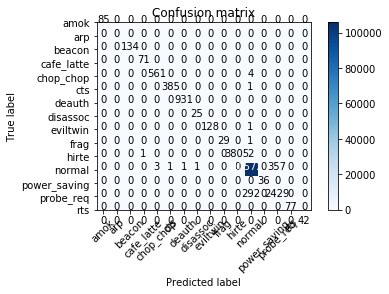

In [17]:
%%time
run_rand(X_train,X_test,Y_train,Y_test)

In [25]:
X.to_csv('AWIDprocessed.csv')

In [26]:
Y.to_csv('AWIDprocessedtarget.csv')

C:\Users\Monica\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
def run_rand(X_train,X_test,Y_train,Y_test):
    clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(X_train,Y_train)
    Y_pred=clf.predict(X_test)
    cnf_matrix = confusion_matrix(Y_test, Y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,1,13,14])
    np.set_printoptions(precision=15)

    print (classification_report(Y_test, Y_pred))
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['amok','arp','beacon','cafe_latte','chop_chop','cts','deauth','disassoc','eviltwin','frag','hirte','normal','power_saving','probe_req','rts'],normalize= False,  title='Confusion matrix')
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       0.87      0.89      0.88      2721
           2       1.00      1.00      1.00       134
           3       0.99      1.00      0.99        71
           4       0.99      0.99      0.99       565
           5       1.00      1.00      1.00       386
           6       1.00      1.00      1.00       931
           7       0.96      1.00      0.98        25
           8       1.00      0.99      1.00       129
           9       1.00      0.97      0.98        30
          10       1.00      1.00      1.00      3808
          11       1.00      1.00      1.00    106089
          12       1.00      1.00      1.00        36
          13       1.00      1.00      1.00        77
          14       1.00      1.00      1.00        42

    accuracy                           0.99    115129
   macro avg       0.99      0.99      0.99    115129
weighted avg       0.99   

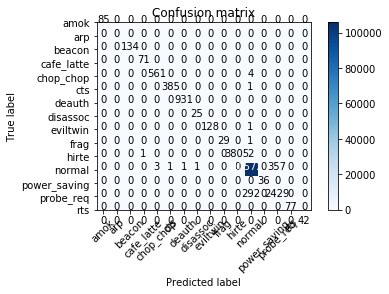

In [36]:
%%time
run_rand(X_train,X_test,Y_train,Y_test)

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train) 
yhat = clf.predict(X_test)

In [ ]:
cnf_matrix = confusion_matrix(Y_test, yhat, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,1,13,14])
np.set_printoptions(precision=15)
print (classification_report(Y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['amok','arp','beacon','cafe_latte','chop_chop','cts','deauth','disassoc','eviltwin','frag','hirte','normal','power_saving','probe_req','rts'],normalize= False,  title='Confusion matrix')
    

In [ ]:
def ClassDist(dirname):
    df=pd.read_table(dirname,header=None,sep=',')
    data=np.array(df[154])
    size=len(df)
    unique, freq=np.unique(data,return_counts=True)
    colors=['red','gold','green','Aqua','Teal','lightcoral','yellow','orange','purple','beige','tan','hotpink','white','peachpuff','lime']
    p=freq/size*100
    per=np.around(p,decimals=2)
    X=per.astype(np.str)
    labels=unique+' '+X+"%"
    seg,texts=mp.pie(freq,colors=colors)
    mp.title(dirname)
    mp.axis('equal')
    mp.legend(seg,labels,loc='upper left',fontsize=8)
    return mp

In [11]:
for col_name in X.columns: 
    print(col_name)

frame.interface_id
frame.offset_shift
frame.time_epoch
frame.time_delta
frame.time_delta_displayed
frame.time_relative
frame.len
frame.cap_len
frame.marked
frame.ignored
radiotap.version
radiotap.pad
radiotap.length
radiotap.present.tsft
radiotap.present.flags
radiotap.present.rate
radiotap.present.channel
radiotap.present.fhss
radiotap.present.dbm_antsignal
radiotap.present.dbm_antnoise
radiotap.present.lock_quality
radiotap.present.tx_attenuation
radiotap.present.db_tx_attenuation
radiotap.present.dbm_tx_power
radiotap.present.antenna
radiotap.present.db_antsignal
radiotap.present.db_antnoise
radiotap.present.rxflags
radiotap.present.xchannel
radiotap.present.mcs
radiotap.present.ampdu
radiotap.present.vht
radiotap.present.rtap_ns
radiotap.present.vendor_ns
radiotap.present.ext
radiotap.datarate
wlan.fc.version
wlan.fc.type
wlan.fc.subtype
wlan.fc.frag
wlan.fc.retry
wlan.fc.pwrmgt
wlan.fc.moredata
wlan.fc.protected
wlan.fc.order


C:\Users\Monica\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


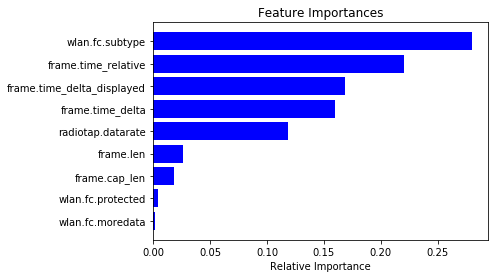

In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X,Y)
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()